# <center>Data Mining Project </center>
## <center> Lung Cancer Prediction </center>
#### <center> Srilekha Malraju(msrilekh@iu.edu), Rohith Venkata Reddy(rohi@iu.edu) </center>

#### Importing required libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

#### Reading data

In [ ]:
df = pd.read_csv('cancer patient data sets.csv')
df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


### Performing Exploratory Data Analysis

#### Checking for unique values count of Patient ID

In [ ]:
df['Patient Id'].nunique()

1000

#### Checking for info of the dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

#### Describing the dataset

In [ ]:
df.describe()

,index,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
count,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,...,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000
std,288.819436,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,...,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686
min,0.000000,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,249.750000,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,499.500000,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,...,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,749.250000,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,...,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000
max,999.000000,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,...,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


#### Checking for null values

In [ ]:
df.isnull().sum()

index                       0
Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

In [ ]:
df=df.drop(['Patient Id','index'],axis=1)

#### Cancer Level count plot
- There are 3 levels of Cancer in the dataset : Low, Medium and High risk of cancer. Plotting the counts of it in order to check if there exists no basis to any of the classes.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


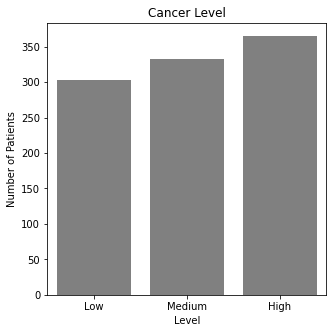

In [ ]:
plt.figure(figsize = (5, 5))
df_lung_cancer = df[df["Level"]=='High']
sns.countplot(df["Level"], color ='grey')
plt.title("Cancer Level")
plt.xticks([0, 1, 2], ('Low', 'Medium', 'High'))
plt.ylabel('Number of Patients');
plt.show()


#### Gender Distribution count plot

- Plotting Gender vs Count of population in the dataset to check if the dataset is gender basis.
- Male is 1 and Female 2

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 360x360 with 0 Axes>

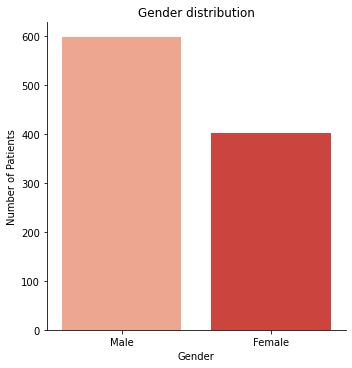

In [ ]:
plt.figure(figsize = (5, 5))
sns.catplot('Gender',data=df,kind='count',palette='Reds')
plt.xticks([0, 1], ('Male', 'Female'))
plt.xlabel('Gender');
plt.ylabel('Number of Patients');
plt.title('Gender distribution');
plt.show()

#### Gender Wise Age Distribution histogram plot

- Checked if the the balance between age and gender exists for each class 

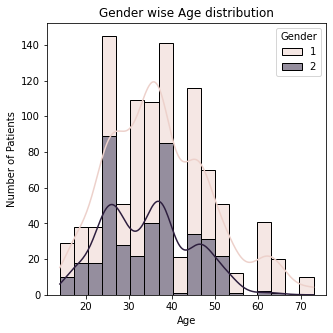

In [ ]:
plt.figure(figsize = (5, 5))
sns.histplot(data=df,x='Age',hue="Gender",kde=True,multiple='stack',color='grey')
plt.xlabel('Age');
plt.ylabel('Number of Patients');
plt.title('Gender wise Age distribution');

plt.show()

#### Multiple box plots for all the attributes with level of the attribute values 

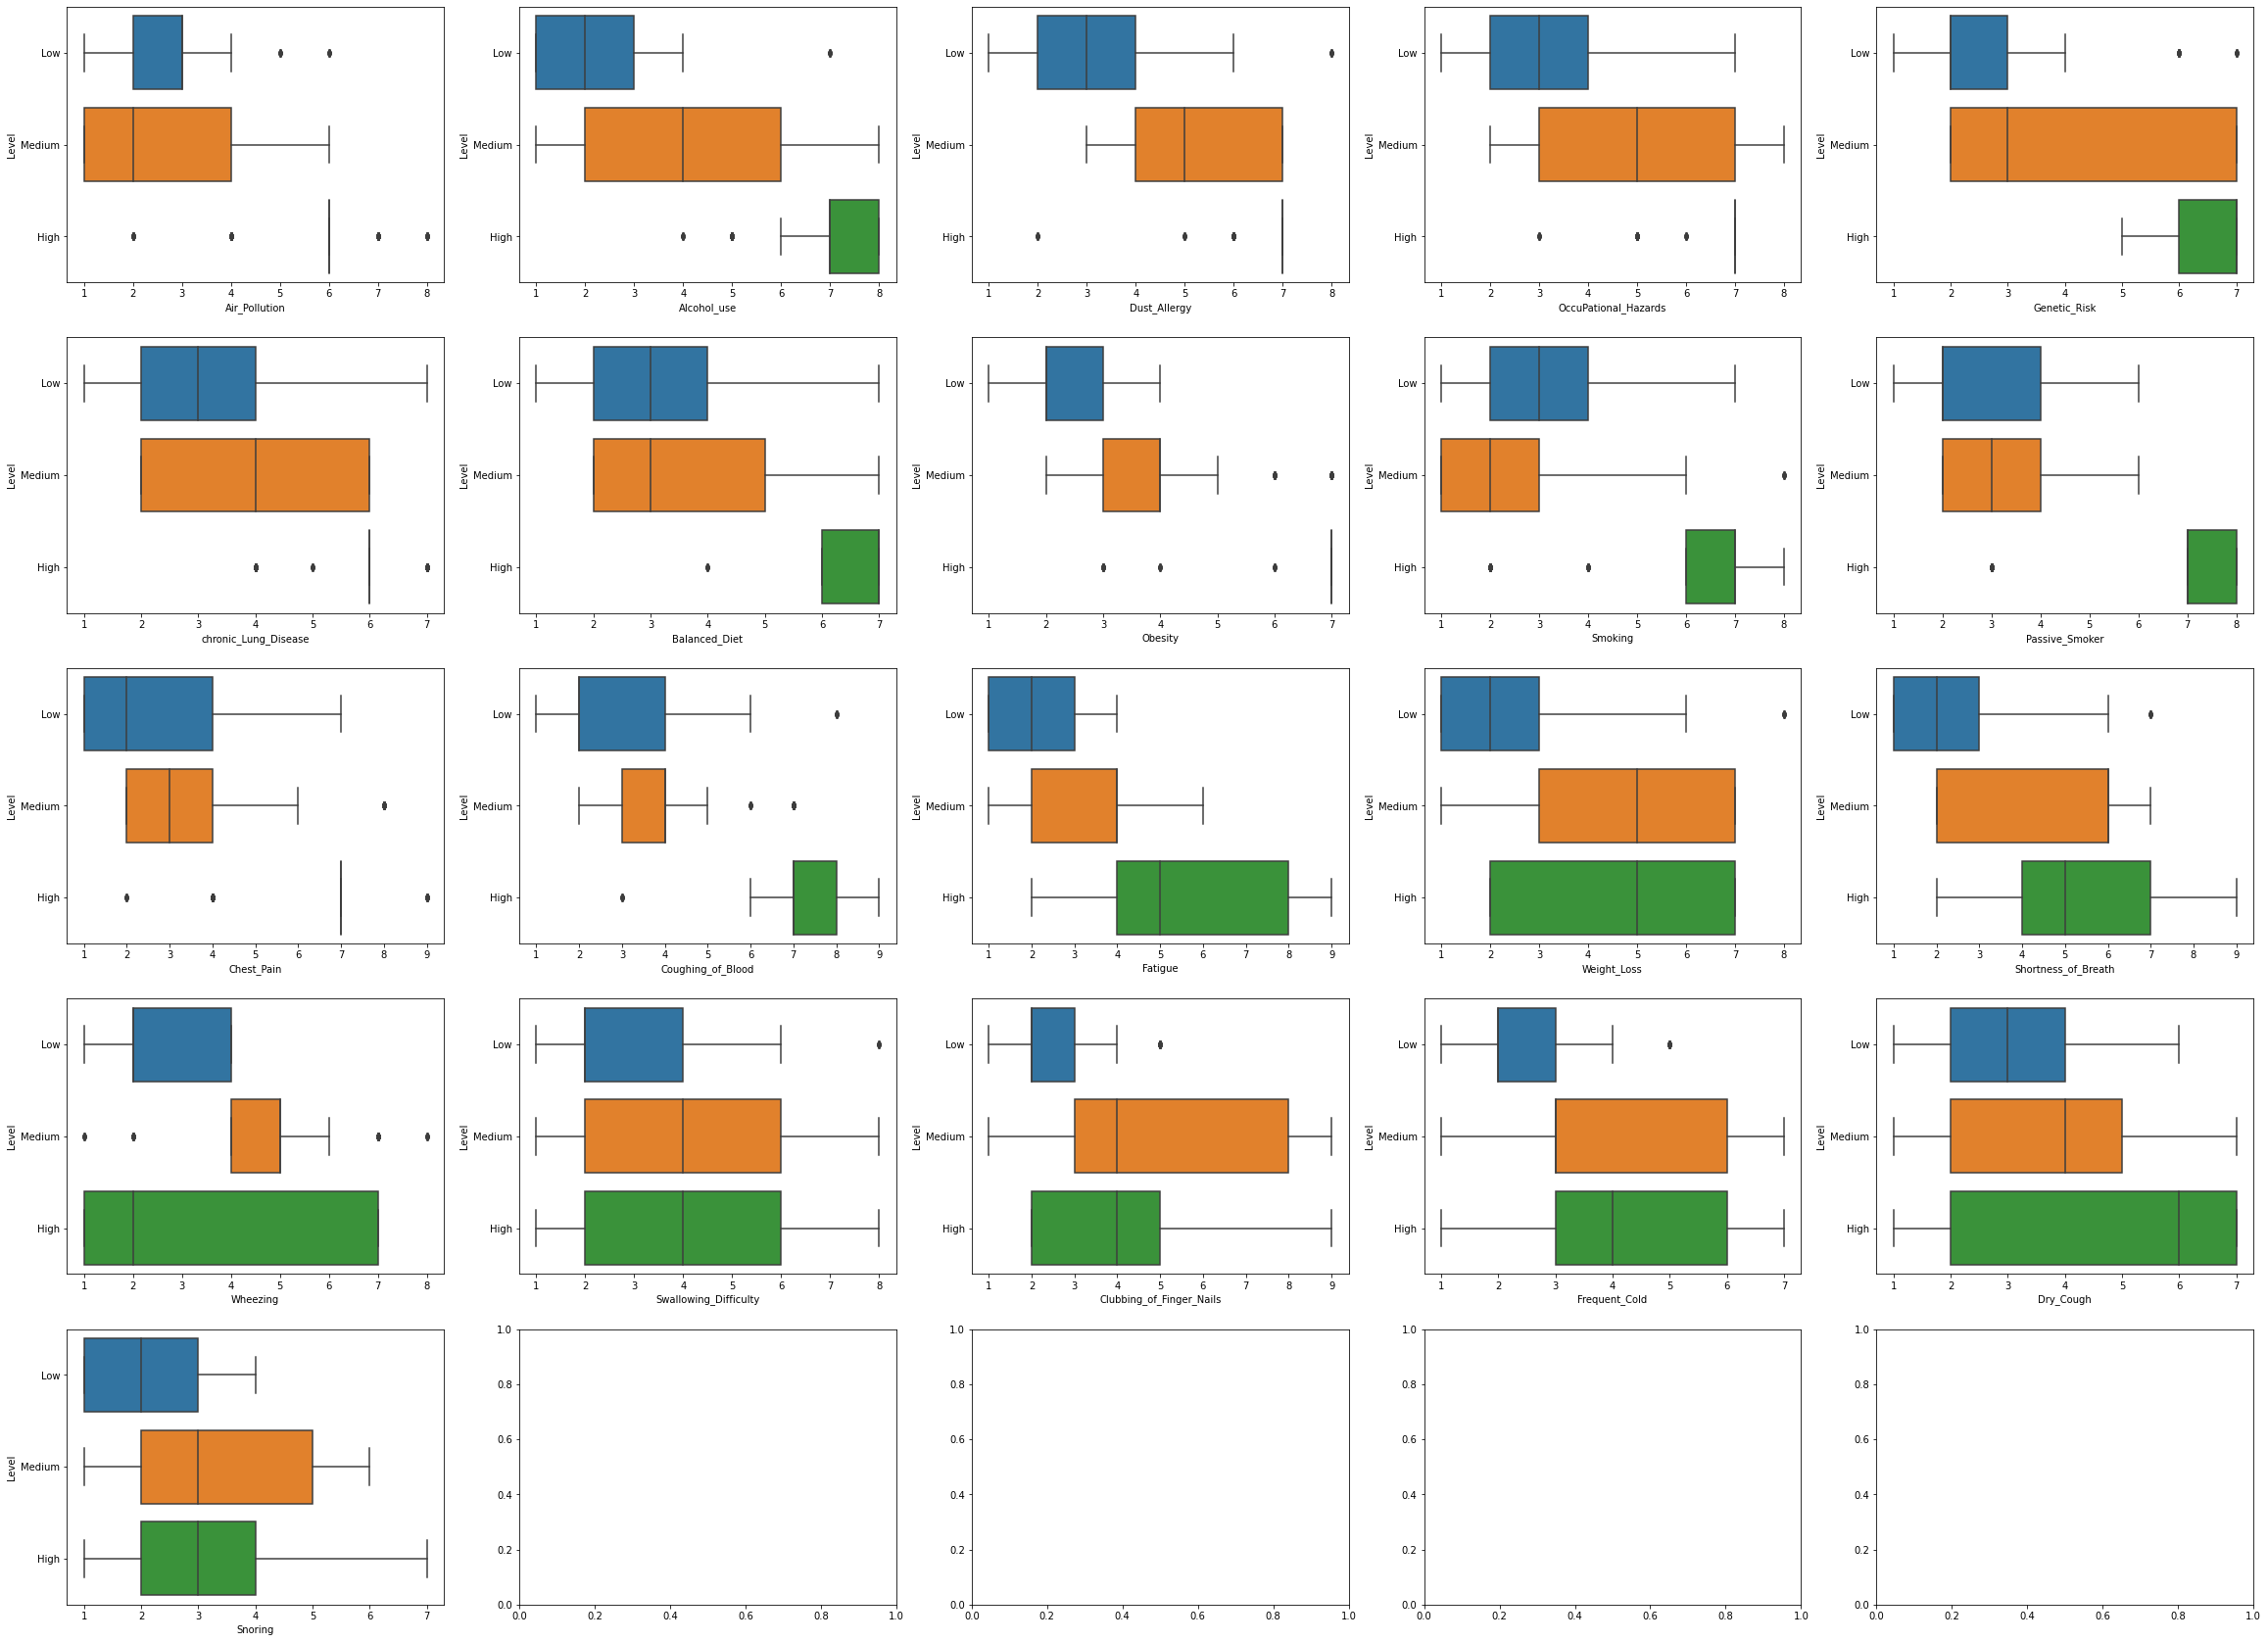

In [ ]:

df.columns = [c.replace(' ', '_') for c in df.columns]

f, axes = plt.subplots(5,5,figsize=(40,30))

sns.boxplot(data = df, x = 'Air_Pollution', y = 'Level' ,ax=axes[0,0])
sns.boxplot(data = df, x="Alcohol_use",y = 'Level' , ax=axes[0,1])
sns.boxplot(data = df,  x="Dust_Allergy", y = 'Level' ,ax=axes[0,2])
sns.boxplot(data = df,  x="OccuPational_Hazards",y = 'Level' , ax=axes[0,3])
sns.boxplot(data = df,  x="Genetic_Risk",y = 'Level' , ax=axes[0,4])
sns.boxplot(data = df,  x="chronic_Lung_Disease",y = 'Level' , ax=axes[1,0])
sns.boxplot(data = df,  x="Balanced_Diet",y = 'Level' , ax=axes[1,1])
sns.boxplot(data = df,  x="Obesity", y = 'Level' ,ax=axes[1,2])
sns.boxplot(data = df,  x="Smoking",y = 'Level' , ax=axes[1,3])
sns.boxplot(data = df,  x="Passive_Smoker", y = 'Level' ,ax=axes[1,4])
sns.boxplot(data = df,  x="Chest_Pain",y = 'Level' , ax=axes[2,0])
sns.boxplot(data = df,  x="Coughing_of_Blood", y = 'Level' ,ax=axes[2,1])
sns.boxplot(data = df, x="Fatigue",y = 'Level' , ax=axes[2,2])
sns.boxplot(data = df,  x="Weight_Loss", y = 'Level' ,ax=axes[2,3])
sns.boxplot(data = df,  x="Shortness_of_Breath",y = 'Level' , ax=axes[2,4])
sns.boxplot(data = df,  x="Wheezing", y = 'Level' ,ax=axes[3,0])
sns.boxplot(data = df,  x="Swallowing_Difficulty",y = 'Level' , ax=axes[3,1])
sns.boxplot(data = df,  x="Clubbing_of_Finger_Nails",y = 'Level' , ax=axes[3,2])
sns.boxplot(data = df,  x="Frequent_Cold", y = 'Level' ,ax=axes[3,3])
sns.boxplot(data = df,  x="Dry_Cough", y = 'Level' ,ax=axes[3,4])
sns.boxplot(data = df,  x="Snoring",y = 'Level' , ax=axes[4,0])
plt.show()

df.columns = [c.replace('_', ' ') for c in df.columns]


#### Multiple count plots for all the attributes with level of the attribute values 

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

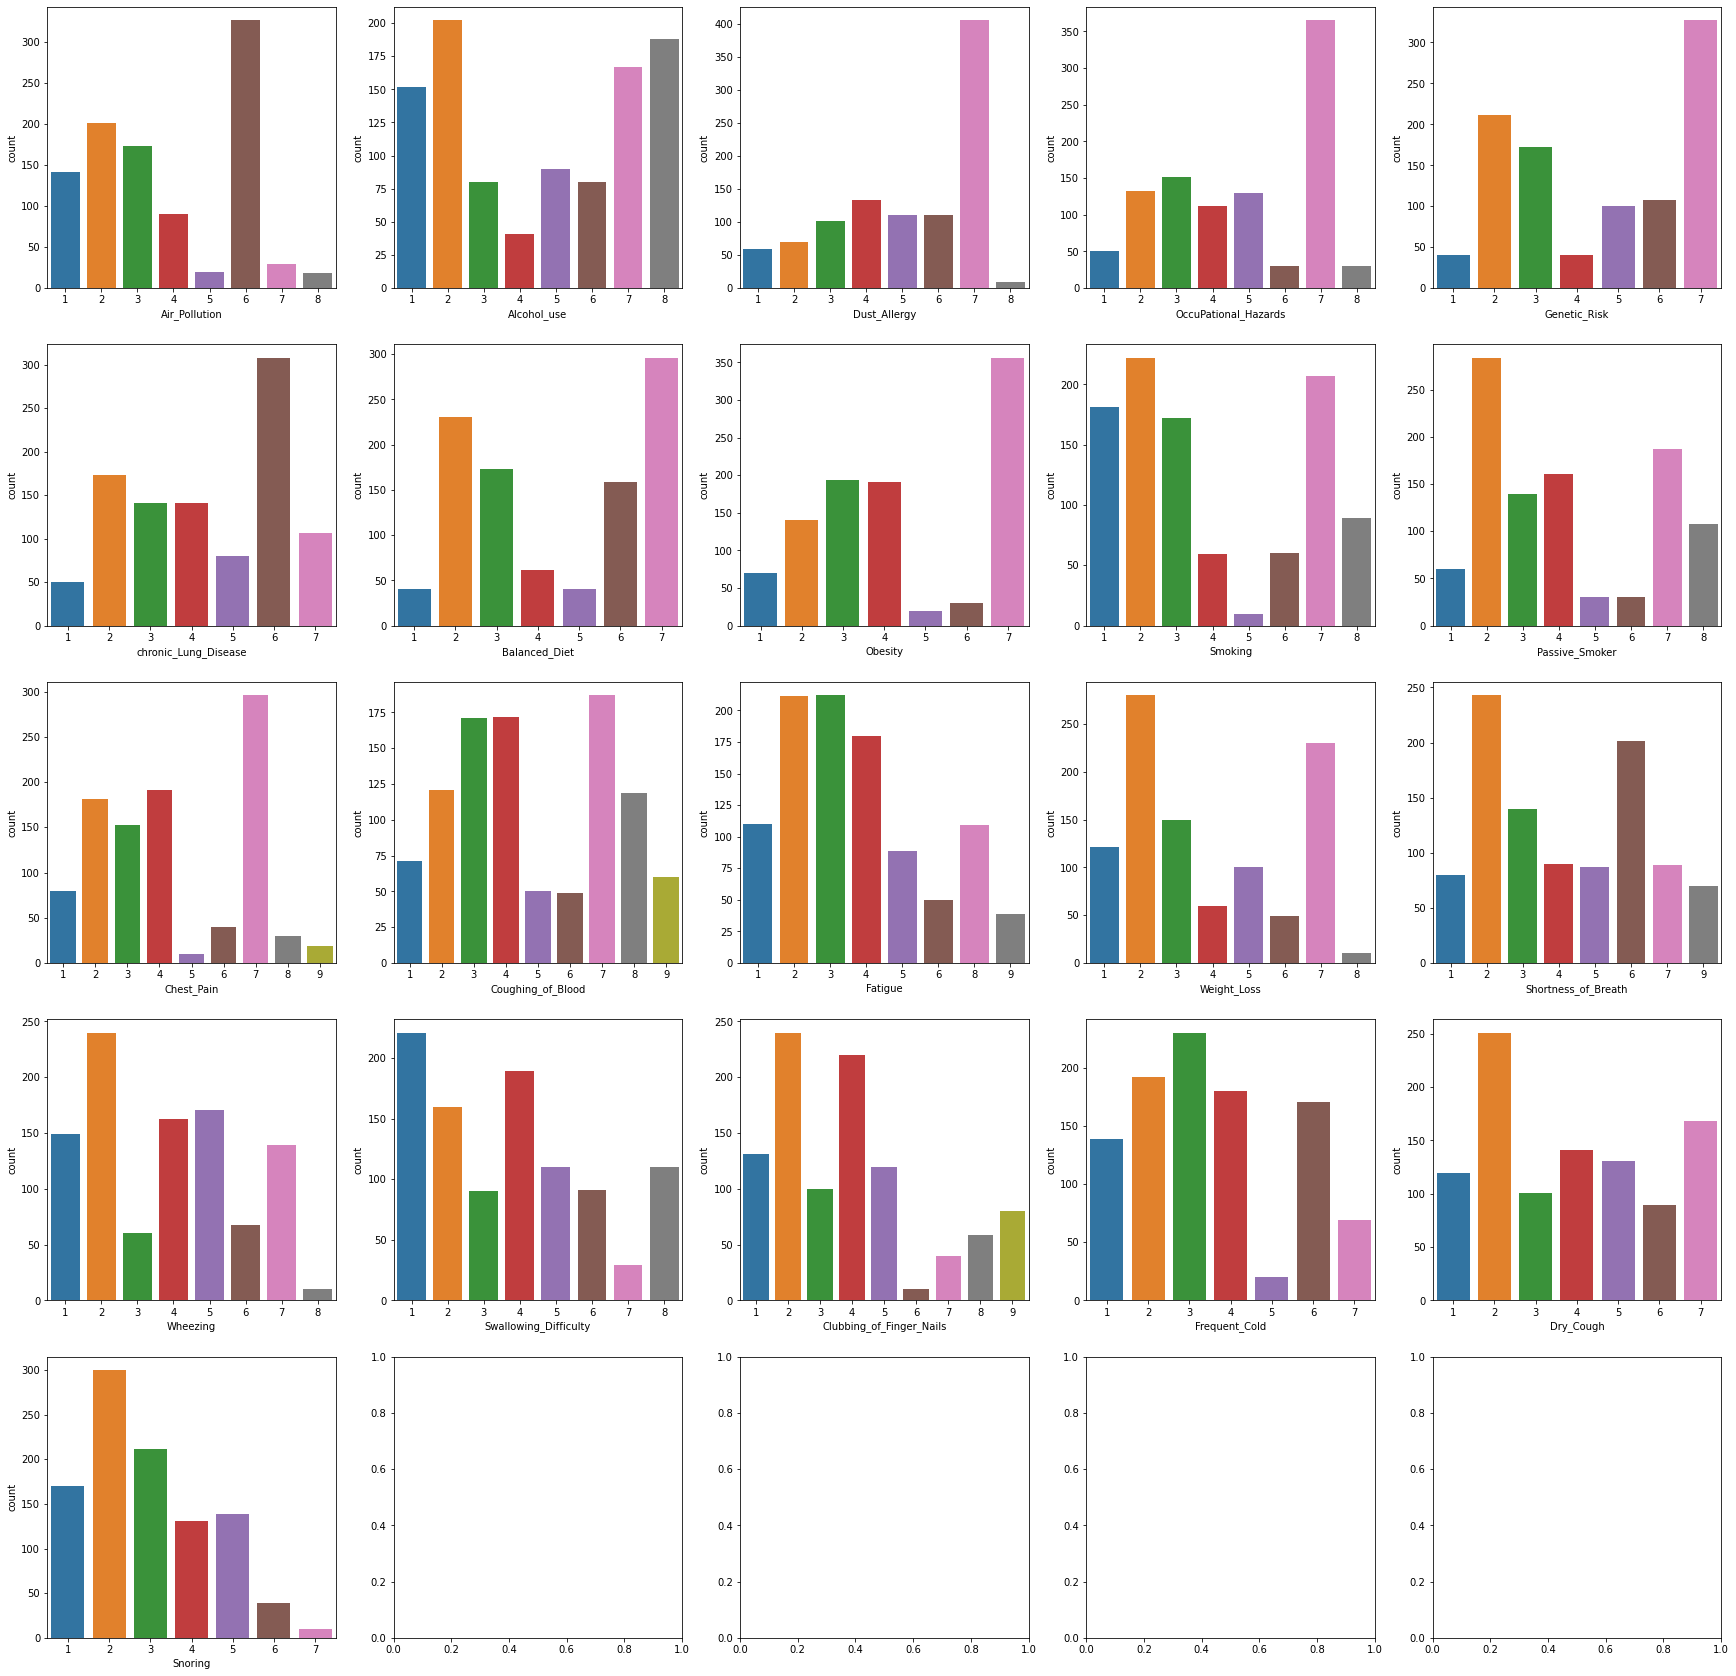

In [ ]:
df.columns = [c.replace(' ', '_') for c in df.columns]

f, axes = plt.subplots(5,5,figsize=(30,30))

sns.countplot(df.Air_Pollution, x='Air_Pollution',ax=axes[0,0])
sns.countplot(df.Alcohol_use, x="Alcohol_use", ax=axes[0,1])
sns.countplot(df.Dust_Allergy, x="Dust_Allergy", ax=axes[0,2])
sns.countplot(df.OccuPational_Hazards, x="OccuPational_Hazards", ax=axes[0,3])
sns.countplot(df.Genetic_Risk, x="Genetic_Risk", ax=axes[0,4])
sns.countplot(df.chronic_Lung_Disease, x="chronic_Lung_Disease", ax=axes[1,0])
sns.countplot(df.Balanced_Diet, x="Balanced_Diet", ax=axes[1,1])
sns.countplot(df.Obesity, x="Obesity", ax=axes[1,2])
sns.countplot(df.Smoking, x="Smoking", ax=axes[1,3])
sns.countplot(df.Passive_Smoker, x="Passive_Smoker", ax=axes[1,4])
sns.countplot(df.Chest_Pain, x="Chest_Pain", ax=axes[2,0])
sns.countplot(df.Coughing_of_Blood, x="Coughing_of_Blood", ax=axes[2,1])
sns.countplot(df.Fatigue, x="Fatigue", ax=axes[2,2])
sns.countplot(df.Weight_Loss, x="Weight_Loss", ax=axes[2,3])
sns.countplot(df.Shortness_of_Breath, x="Shortness_of_Breath", ax=axes[2,4])
sns.countplot(df.Wheezing, x="Wheezing", ax=axes[3,0])
sns.countplot(df.Swallowing_Difficulty, x="Swallowing_Difficulty", ax=axes[3,1])
sns.countplot(df.Clubbing_of_Finger_Nails, x="Clubbing_of_Finger_Nails", ax=axes[3,2])
sns.countplot(df.Frequent_Cold, x="Frequent_Cold", ax=axes[3,3])
sns.countplot(df.Dry_Cough, x="Dry_Cough", ax=axes[3,4])
sns.countplot(df.Snoring, x="Snoring", ax=axes[4,0])
plt.show()


df.columns = [c.replace('_', ' ') for c in df.columns]

#### Changing the level values to int to check correlation

Chaning the values of Low, Meduim and High classes of the level of cancer to 0, 1 and 2 in order to check correlation.

In [ ]:
df['Level'] = df['Level'].replace(['Low', 'Medium', 'High'], ['0', '1', '2'])

In [ ]:
df['Level']=df['Level'].astype(str).astype(int)

In [ ]:
df.dtypes

Age                         int64
Gender                      int64
Air Pollution               int64
Alcohol use                 int64
Dust Allergy                int64
OccuPational Hazards        int64
Genetic Risk                int64
chronic Lung Disease        int64
Balanced Diet               int64
Obesity                     int64
Smoking                     int64
Passive Smoker              int64
Chest Pain                  int64
Coughing of Blood           int64
Fatigue                     int64
Weight Loss                 int64
Shortness of Breath         int64
Wheezing                    int64
Swallowing Difficulty       int64
Clubbing of Finger Nails    int64
Frequent Cold               int64
Dry Cough                   int64
Snoring                     int64
Level                       int64
dtype: object

In [ ]:
df.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,0
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,1
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,2
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,2
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,2


#### Finding attributes that are highly correlated with Level

In [ ]:
correlations = df.corr()['Level'].sort_values()
print('Most Correlated features with Level of Lung Cancer:\n', correlations.tail(7))
print('\nLeast Correlated features with Level of Lung Cancer:\n', correlations.head(7))

Most Correlated features with Level of Lung Cancer:
 Passive Smoker       0.703594
Balanced Diet        0.706273
Dust Allergy         0.713839
Alcohol use          0.718710
Coughing of Blood    0.782092
Obesity              0.827435
Level                1.000000
Name: Level, dtype: float64

Least Correlated features with Level of Lung Cancer:
 Gender                     -0.164985
Age                         0.060048
Wheezing                    0.242794
Swallowing Difficulty       0.249142
Clubbing of Finger Nails    0.280063
Snoring                     0.289366
Weight Loss                 0.352738
Name: Level, dtype: float64


#### Finding each attributes correlation with Level

In [ ]:
corr_df = df.corr()['Level'].sort_values()
corr_df = corr_df.reset_index().rename(columns={'index':'Attributes','Level':'Correlation'})
corr_df

,Attributes,Correlation
0,Gender,-0.164985
1,Age,0.060048
2,Wheezing,0.242794
3,Swallowing Difficulty,0.249142
4,Clubbing of Finger Nails,0.280063
5,Snoring,0.289366
6,Weight Loss,0.352738
7,Dry Cough,0.373968
8,Frequent Cold,0.444017
9,Shortness of Breath,0.497024


#### Correlation heat map

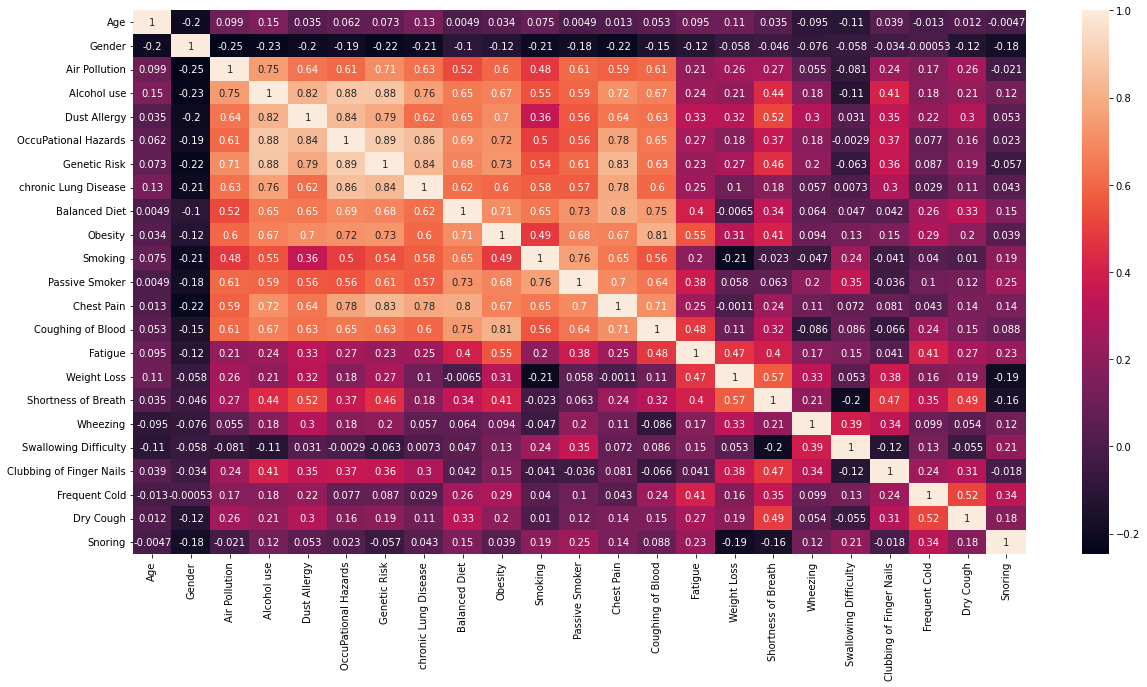

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df.drop('Level',axis=1).corr(),annot=True)

#### Applying Machine Learning models


First let's import important libraries, which helps me in the process of splitting the data in to train and test and evaluating the macine learning models we model across a common metrics 

In [ ]:
# Provides train/test indices to split data in train/test sets. Split dataset into k consecutive folds (without shuffling by default).
from sklearn.model_selection import train_test_split,KFold,cross_val_score
# Build a text report showing the main classification metrics, computes subset accuracy
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,mean_squared_error
# THe below import Standardize features by removing the mean and scaling to unit variance.
from sklearn.preprocessing import StandardScaler 
# Compute precision, recall, F-measure and support for each class.
from sklearn.metrics import precision_recall_fscore_support as score

In [ ]:
X=df.drop('Level',axis=1) # Created the Predictors i.e seperated the target paramenter from data and stored as X
# Created the target variable from the data frame.
Y=df['Level']
# mseTracker is an dictionary object which would be used to store the MSE- Mean squared error for each of the model.
mseTracker={}
# accuracyTracker is an dictionary object which would be used to store the model accuries for each of the model.
accuracyTracker={}
# KFoldAccuries is a dataframe created and will be used for saving the max, min and mean accuraies obtained by K -fold cross validation technique 
dict = {'Model':[],
        'Min Accuracy':[],
        'Mean Accuracy':[],
        'Max Accuracy':[],
       }
KFoldAccuries=pd.DataFrame(dict);
# scoreTracker is an dictionary object which would be used to store the model Precision,Recall and F1-score for each of the model.
scoreTracker=pd.DataFrame({
    'Model':[],
    'Precision':[],
    'Recall':[],
    'F1-score':[]
})

- function getMSEForModel(params) would caluclated the values for the model Precision,Recall and F1-score based on the acutal labesl and the predicted labels and save it in scoreTracker variable using model name as the key.

In [ ]:
def getMSEForModel(modelName,y_test,y_pred):
  mse=mean_squared_error(y_test,y_pred)
  precision,recall,fscore,support=score(y_test,y_pred,average='macro')
  mseTracker[modelName]=mse
  scoreTracker.loc[len(scoreTracker.index)] = [modelName,precision,recall,fscore] 
  return mse

- function testKFold(params) would caluclated the values for the model min,max and mean accuraies based on K value given and save it in KFoldAccuries variable using model name as the index.
- function getAccuracyForModel(params) would call the above method and also calculate the regularised accuracy score based on test labels and the predicted labels which will be passed as args to the function.

In [ ]:
def testKFold(model,K):
  kfold_validation=KFold(K)
  results=cross_val_score(model,X_train,Y_train,cv=kfold_validation)
  KFoldAccuries.loc[len(KFoldAccuries.index)] = [type(model).__name__,np.min(results),np.mean(results),np.max(results)] 
  min,mean,max=np.min(results),np.mean(results),np.max(results)
  print()
  print('Accuracy of ',type(model).__name__,' model when K Fold= ',K,': ')
  print('Min Accuracy',min)
  print('Max Accuracy',max)
  print('Mean Accuracy',mean)
  print()
  return np.min(results),np.mean(results),np.max(results)

def getAccuracyForModel(model,y_test,y_pred):
  K=10
  score=accuracy_score(y_test,y_pred)
  accuracyTracker[type(model).__name__]=score
  testKFold(model,K);
  return accuracyTracker[type(model).__name__]

- Here, we would split the data to train and test data based on the ratio given (30% test data in our case). train data would be used to train(fit) the model and test data would be used to evaluate/validate the trained model

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=44)

In [ ]:
X_train.shape,Y_train.shape

((700, 23), (700,))

- StandardScaler removes the mean and scales each feature/variable to unit variance. This operation is performed feature-wise in an independent way. 

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

- In the multiclass classification case, the training algorithm uses the one-vs-rest (OvR) scheme if the ‘multi_class’ option is set to ‘ovr’. which is done in the below line
- Model is trained in the second line using .fit()

In [ ]:
logmodel = LogisticRegression(random_state=0, multi_class='ovr')
logmodel.fit(X_train,Y_train)

LogisticRegression(multi_class='ovr', random_state=0)

In [ ]:
Y_train

357    0
645    1
271    0
400    1
342    1
      ..
571    1
173    0
753    2
419    1
788    2
Name: Level, Length: 700, dtype: int64

In [ ]:
X_train

array([[-1.17116393,  1.23944822,  0.08190761, ...,  0.20840258,
        -0.4403713 , -1.34657148],
       [ 1.31208526,  1.23944822, -1.41379651, ...,  0.20840258,
        -0.92353731,  1.40554542],
       [ 0.11327531,  1.23944822, -0.41666043, ...,  0.74870557,
        -1.40670332, -1.34657148],
       ...,
       [ 0.627051  , -0.80681063,  1.07904368, ...,  0.20840258,
         0.52596071,  0.02948697],
       [ 0.71268028, -0.80681063,  1.07904368, ..., -0.33190041,
         0.0427947 , -0.65854226],
       [ 2.33963665, -0.80681063,  1.07904368, ..., -0.33190041,
        -1.40670332,  0.71751619]])

In the next line, the trained model is tested on the test data to predict the outcome based on the input.

In [ ]:
Y_pred = logmodel.predict(X_test)
Y_pred

array([0, 1, 0, 2, 2, 2, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 2, 0, 1, 0, 0, 0,
       2, 1, 1, 1, 1, 1, 1, 0, 1, 0, 2, 2, 1, 0, 0, 0, 0, 1, 2, 2, 1, 1,
       2, 2, 1, 2, 1, 1, 0, 2, 0, 2, 1, 2, 0, 1, 0, 1, 2, 0, 0, 2, 2, 0,
       1, 1, 1, 2, 2, 2, 1, 0, 2, 1, 2, 0, 2, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       2, 1, 2, 1, 0, 2, 2, 1, 1, 2, 1, 2, 1, 0, 1, 0, 0, 0, 2, 0, 2, 1,
       1, 0, 2, 2, 1, 1, 1, 0, 0, 0, 1, 2, 2, 1, 0, 0, 1, 2, 0, 1, 1, 1,
       2, 0, 2, 0, 0, 2, 2, 1, 2, 0, 1, 0, 2, 1, 1, 1, 2, 2, 2, 0, 2, 2,
       0, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 0, 2, 1, 0, 1, 1,
       0, 1, 1, 0, 2, 2, 1, 2, 0, 2, 1, 0, 0, 1, 2, 2, 1, 2, 2, 0, 1, 2,
       1, 2, 0, 1, 0, 2, 1, 2, 1, 0, 2, 0, 0, 2, 0, 1, 2, 2, 0, 0, 2, 1,
       1, 0, 1, 0, 2, 0, 1, 1, 2, 0, 2, 0, 0, 2, 2, 1, 2, 0, 2, 0, 0, 1,
       2, 0, 1, 1, 2, 1, 0, 0, 1, 1, 2, 2, 2, 1, 1, 1, 1, 0, 0, 2, 0, 0,
       2, 0, 2, 0, 0, 0, 0, 2, 1, 1, 2, 0, 0, 0, 2, 1, 0, 1, 0, 2, 0, 2,
       2, 2, 2, 2, 2, 0, 2, 1, 0, 1, 0, 0, 2, 0])

Computes confusion matrix to evaluate the accuracy of a classification.

In [ ]:
confusion_matrix(Y_test, Y_pred)


array([[ 94,   1,   0],
       [  5, 105,   0],
       [  0,   0,  95]])

Build a text report showing the main classification metrics such has precision,f1-score and recall values for the actual and predicted values.

In [ ]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97        95
           1       0.99      0.95      0.97       110
           2       1.00      1.00      1.00        95

    accuracy                           0.98       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300



Text(33.0, 0.5, 'Actual')

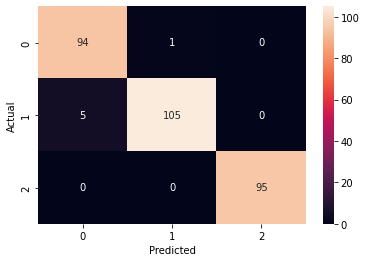

In [ ]:
sns.heatmap(confusion_matrix(Y_test, Y_pred),annot=True,fmt='g')
plt.xlabel("Predicted")
plt.ylabel("Actual")


In [ ]:
print('Mean squared error for ',type(logmodel).__name__,': ',getMSEForModel(type(logmodel).__name__,Y_test, Y_pred))
Accuracy=getAccuracyForModel(logmodel,Y_test,Y_pred)
print('Accuracy of ',type(logmodel).__name__,' model: ',Accuracy)


Mean squared error for  LogisticRegression :  0.02

Accuracy of  LogisticRegression  model when K Fold=  10 : 
Min Accuracy 0.9428571428571428
Max Accuracy 1.0
Mean Accuracy 0.9771428571428572

Accuracy of  LogisticRegression  model:  0.98


#### Linear Regression

- LinearRegression fits a linear model with coefficients w = (w1, …, wp) to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
X_test.shape,Y_train.shape

((300, 23), (700,))

In [ ]:
regModel = LinearRegression()
regModel.fit(X_train,Y_train)

LinearRegression()

In [ ]:
#predicting the results from test data X
y_pred = regModel.predict(X_test)

In [ ]:
# Rounding off the values since the required values are discrete and not Continous. 
Y_pred=np.abs(np.round(y_pred))

In [ ]:
confusion_matrix(Y_test, Y_pred)

array([[ 82,  13,   0],
       [  0, 110,   0],
       [  0,   3,  92]])

Build a text report showing the main classification metrics such has precision,f1-score and recall values for the actual and predicted values.

In [ ]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       1.00      0.86      0.93        95
           1       0.87      1.00      0.93       110
           2       1.00      0.97      0.98        95

    accuracy                           0.95       300
   macro avg       0.96      0.94      0.95       300
weighted avg       0.95      0.95      0.95       300



In [ ]:
print('Mean squared error for ',type(regModel).__name__,': ',getMSEForModel(type(regModel).__name__,Y_test, Y_pred))
Accuracy=getAccuracyForModel(regModel,Y_test,Y_pred)
print('Accuracy of ',type(regModel).__name__,' model: ',Accuracy)

Mean squared error for  LinearRegression :  0.05333333333333334

Accuracy of  LinearRegression  model when K Fold=  10 : 
Min Accuracy 0.881772615649318
Max Accuracy 0.9483815073032689
Mean Accuracy 0.9283261585490743

Accuracy of  LinearRegression  model:  0.9466666666666667


- Plotting a heatmap of the confusion matrix with flags annot=True which plots with numbers of strength and fmt='g' signifies the values to be displayed as integer.

Text(33.0, 0.5, 'Actual')

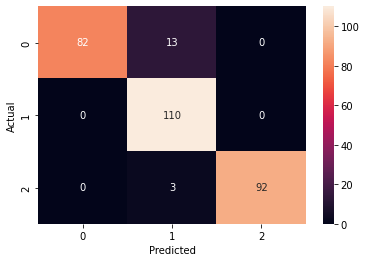

In [ ]:
sns.heatmap(confusion_matrix(Y_test, Y_pred),annot=True,fmt='g')
plt.xlabel("Predicted")
plt.ylabel("Actual")


#### Gaussian Naive Bayes

- Gaussian Naïve Bayes: GN Bayes’s rule provides us with the formula for the probability of Y given some feature X.

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
model = GaussianNB()
model.fit(X_train,Y_train)

GaussianNB()

In [ ]:
Y_pred = model.predict(X_test)
Y_pred

array([0, 1, 0, 2, 2, 2, 1, 1, 1, 1, 1, 0, 2, 0, 2, 1, 2, 0, 2, 0, 0, 2,
       2, 1, 1, 1, 1, 1, 2, 0, 1, 0, 2, 2, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1,
       2, 2, 2, 2, 1, 1, 0, 2, 0, 2, 2, 2, 0, 1, 0, 1, 2, 0, 0, 2, 2, 0,
       1, 1, 1, 2, 2, 2, 1, 0, 2, 1, 2, 0, 2, 1, 0, 1, 0, 1, 0, 1, 2, 0,
       2, 1, 2, 1, 0, 2, 2, 2, 1, 2, 1, 2, 1, 0, 1, 0, 0, 0, 2, 0, 1, 1,
       1, 0, 2, 2, 1, 1, 1, 2, 0, 0, 1, 2, 2, 2, 0, 2, 1, 2, 0, 1, 1, 2,
       2, 0, 2, 0, 0, 2, 2, 2, 2, 0, 1, 2, 2, 1, 1, 1, 2, 2, 2, 0, 2, 2,
       0, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 2, 0, 2, 1, 0, 1, 1,
       0, 1, 1, 0, 2, 1, 1, 2, 0, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 0, 1, 2,
       1, 2, 0, 1, 0, 2, 1, 2, 2, 0, 2, 0, 0, 2, 1, 1, 2, 2, 2, 2, 2, 1,
       1, 0, 1, 0, 2, 0, 1, 1, 2, 0, 2, 2, 1, 2, 2, 2, 2, 0, 2, 0, 1, 1,
       2, 0, 2, 1, 2, 1, 0, 0, 1, 1, 2, 2, 2, 2, 1, 1, 1, 0, 0, 2, 1, 0,
       2, 0, 2, 2, 0, 0, 0, 2, 1, 2, 2, 0, 0, 0, 2, 1, 0, 1, 0, 2, 0, 2,
       2, 2, 2, 2, 2, 0, 2, 1, 0, 1, 0, 0, 2, 0])

In [ ]:
confusion_matrix(Y_test, Y_pred)

array([[83,  7,  5],
       [ 0, 87, 23],
       [ 0,  3, 92]])

In [ ]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       1.00      0.87      0.93        95
           1       0.90      0.79      0.84       110
           2       0.77      0.97      0.86        95

    accuracy                           0.87       300
   macro avg       0.89      0.88      0.88       300
weighted avg       0.89      0.87      0.87       300



In [ ]:
print('Mean squared error for ',type(model).__name__,': ',getMSEForModel(type(model).__name__,Y_test, Y_pred))
Accuracy=getAccuracyForModel(model,Y_test,Y_pred)
print('Accuracy of ',type(model).__name__,' model: ',Accuracy)

Mean squared error for  GaussianNB :  0.17666666666666667

Accuracy of  GaussianNB  model when K Fold=  10 : 
Min Accuracy 0.8571428571428571
Max Accuracy 0.9714285714285714
Mean Accuracy 0.9

Accuracy of  GaussianNB  model:  0.8733333333333333


Text(33.0, 0.5, 'Actual')

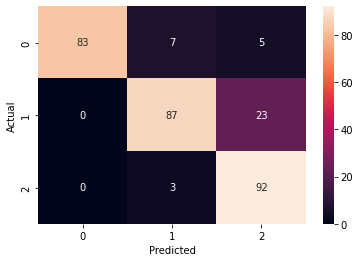

In [ ]:
sns.heatmap(confusion_matrix(Y_test, Y_pred),annot=True,fmt='g')
plt.xlabel("Predicted")
plt.ylabel("Actual")

#### Bernoulli Naive Bayes

- In the multivariate Bernoulli event model, features are independent Booleans (binary variables) describing inputs. Like the multinomial model, this model is popular for document classification tasks

- https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html

In [ ]:
from sklearn.naive_bayes import BernoulliNB

- Naive Bayes classifier for multivariate Bernoulli models.
- Model is trained in the second line using .fit()

In [ ]:
model = BernoulliNB()
model.fit(X_train,Y_train)

BernoulliNB()

In the next line, the trained model is tested on the test data to predict the outcome based on the input.

In [ ]:
Y_pred = model.predict(X_test)
Y_pred

array([0, 1, 0, 2, 2, 2, 1, 0, 1, 1, 1, 0, 2, 0, 2, 1, 2, 0, 2, 0, 0, 2,
       2, 1, 1, 1, 1, 1, 2, 0, 1, 0, 2, 2, 1, 0, 0, 0, 0, 1, 2, 2, 1, 1,
       2, 2, 2, 2, 1, 1, 0, 2, 0, 2, 2, 2, 0, 1, 0, 1, 2, 0, 0, 2, 2, 0,
       1, 1, 1, 2, 2, 2, 1, 0, 2, 1, 2, 0, 2, 1, 0, 1, 0, 1, 0, 1, 2, 0,
       2, 1, 2, 1, 0, 2, 2, 2, 1, 2, 1, 2, 0, 0, 1, 0, 0, 0, 2, 0, 2, 1,
       1, 0, 2, 2, 1, 1, 1, 2, 0, 0, 1, 2, 2, 2, 0, 2, 1, 2, 0, 1, 1, 2,
       2, 0, 2, 0, 0, 2, 2, 2, 2, 0, 1, 2, 2, 1, 1, 1, 2, 2, 2, 0, 2, 2,
       0, 0, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 0, 1, 1, 2, 0, 2, 1, 0, 1, 1,
       0, 1, 1, 0, 2, 2, 1, 2, 0, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 0, 1, 2,
       1, 2, 0, 1, 0, 2, 1, 2, 2, 0, 2, 0, 0, 2, 0, 1, 2, 2, 2, 2, 2, 1,
       1, 0, 0, 0, 2, 0, 1, 1, 2, 0, 2, 2, 1, 2, 2, 2, 2, 0, 2, 0, 1, 1,
       2, 0, 2, 1, 2, 1, 0, 0, 1, 1, 2, 2, 2, 2, 1, 1, 1, 0, 0, 2, 1, 0,
       2, 0, 2, 2, 0, 0, 0, 2, 1, 2, 2, 0, 0, 0, 2, 1, 0, 1, 0, 2, 0, 2,
       2, 2, 2, 2, 2, 0, 2, 1, 0, 1, 0, 0, 2, 0])

Computes confusion matrix to evaluate the accuracy of a classification.

In [ ]:
confusion_matrix(Y_test, Y_pred)

array([[85,  5,  5],
       [ 3, 84, 23],
       [ 0,  0, 95]])

Build a text report showing the main classification metrics such has precision,f1-score and recall values for the actual and predicted values.

In [ ]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93        95
           1       0.94      0.76      0.84       110
           2       0.77      1.00      0.87        95

    accuracy                           0.88       300
   macro avg       0.89      0.89      0.88       300
weighted avg       0.90      0.88      0.88       300



- Plotting a heatmap of the confusion matrix with flags annot=True which plots with numbers of strength and fmt='g' signifies the values to be displayed as integer.

Text(33.0, 0.5, 'Actual')

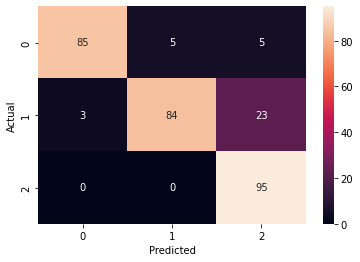

In [ ]:
sns.heatmap(confusion_matrix(Y_test, Y_pred),annot=True,fmt='g')
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [ ]:
print('Mean squared error for ',type(model).__name__,': ',getMSEForModel(type(model).__name__,Y_test, Y_pred))
Accuracy=getAccuracyForModel(model,Y_test,Y_pred)
print('Accuracy of ',type(model).__name__,' model: ',Accuracy)

Mean squared error for  BernoulliNB :  0.17

Accuracy of  BernoulliNB  model when K Fold=  10 : 
Min Accuracy 0.8285714285714286
Max Accuracy 0.9428571428571428
Mean Accuracy 0.8942857142857144

Accuracy of  BernoulliNB  model:  0.88


#### Random Forest

- A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. 
- The sub-sample size is controlled with the max_samples parameter if bootstrap=True (default), otherwise the whole dataset is used to build each tree.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
- Model is trained in the second line using .fit(), params being training data

In [ ]:
model = RandomForestRegressor()
model.fit(X_train,Y_train)

RandomForestRegressor()

In the next line, the trained model is tested on the test data to predict the outcome based on the input.

In [ ]:
Y_pred = model.predict(X_test)
Y_pred

array([0.  , 1.  , 0.  , 2.  , 2.  , 2.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       0.  , 1.  , 0.  , 1.  , 1.  , 2.  , 0.  , 1.  , 0.  , 0.  , 0.  ,
       2.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 0.  , 1.  , 0.  , 2.  ,
       2.  , 1.  , 0.  , 0.  , 0.  , 0.  , 1.  , 2.  , 2.  , 1.  , 1.  ,
       2.  , 2.  , 1.  , 2.  , 1.  , 1.  , 0.  , 2.  , 0.  , 2.  , 1.  ,
       2.  , 0.  , 1.  , 0.  , 1.  , 2.  , 0.  , 0.  , 2.  , 2.  , 0.  ,
       0.  , 1.  , 1.  , 2.  , 2.  , 2.  , 1.  , 0.  , 2.  , 1.  , 2.  ,
       0.  , 2.  , 1.  , 0.  , 1.  , 0.  , 0.  , 0.  , 1.  , 1.  , 0.  ,
       2.  , 1.  , 2.  , 1.  , 0.  , 2.  , 2.  , 1.  , 1.  , 2.  , 1.  ,
       2.  , 1.  , 0.  , 1.  , 0.  , 0.  , 0.  , 2.  , 0.01, 2.  , 1.  ,
       1.  , 0.  , 2.  , 2.  , 1.  , 1.  , 1.  , 1.  , 0.  , 0.  , 1.  ,
       2.  , 2.  , 1.  , 0.  , 1.  , 1.  , 2.  , 0.  , 1.  , 1.  , 1.  ,
       2.  , 0.  , 2.  , 0.  , 0.  , 2.  , 2.  , 1.  , 2.  , 0.  , 1.  ,
       0.  , 2.  , 1.  , 1.  , 1.  , 2.  , 2.  , 2.

- Rounding off the values since the required values are discrete and not Continous. 

In [ ]:
Y_pred=np.abs(np.round(Y_pred))

- Computes confusion matrix to evaluate the accuracy of a classification.

In [ ]:
confusion_matrix(Y_test, Y_pred)

array([[ 95,   0,   0],
       [  0, 110,   0],
       [  0,   0,  95]])

- Build a text report showing the main classification metrics such has precision,f1-score and recall values for the actual and predicted values.

In [ ]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        95
           1       1.00      1.00      1.00       110
           2       1.00      1.00      1.00        95

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



Plotting a heatmap of the confusion matrix with flags annot=True which plots with numbers of strength and fmt='g' signifies the values to be displayed as integer.

Text(33.0, 0.5, 'Actual')

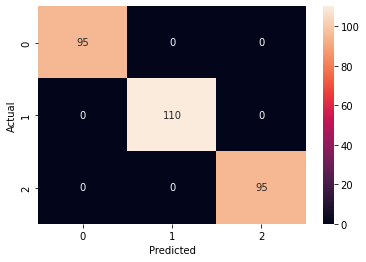

In [ ]:
sns.heatmap(confusion_matrix(Y_test, Y_pred),annot=True,fmt='g')
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [ ]:
print('Mean squared error for ',type(model).__name__,': ',getMSEForModel(type(model).__name__,Y_test, Y_pred))
Accuracy=getAccuracyForModel(model,Y_test,Y_pred)
print('Accuracy of ',type(model).__name__,' model: ',Accuracy)

Mean squared error for  RandomForestRegressor :  0.0

Accuracy of  RandomForestRegressor  model when K Fold=  10 : 
Min Accuracy 0.9999259153318077
Max Accuracy 1.0
Mean Accuracy 0.9999838611629587

Accuracy of  RandomForestRegressor  model:  1.0


#### Support Vector Regressor

- Support Vector Regression is a supervised learning algorithm that is used to predict discrete values. Support Vector Regression uses the same principle as the SVMs. The basic idea behind SVR is to find the best fit line.

In [ ]:
from sklearn.svm import SVR

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html

In [ ]:
model = SVR()
model.fit(X_train,Y_train)

SVR()

In the next line, the trained model is tested on the test data to predict the outcome based on the input.

In [ ]:
Y_pred = model.predict(X_test)
Y_pred

array([ 0.10018962,  1.08932667,  0.14031015,  1.93158903,  1.90009331,
        1.93532798,  1.08242566,  0.9005558 ,  0.92461188,  1.0928405 ,
        0.90032584,  0.07905234,  0.96750557,  0.10011419,  1.10007035,
        1.07199126,  1.90009331,  0.01662455,  0.90023417,  0.09981244,
       -0.01876518,  0.10010542,  1.92797392,  0.90004423,  1.08932667,
        1.099955  ,  1.04011925,  1.099955  ,  0.96750557,  0.05290534,
        0.88662853,  0.0860155 ,  1.97875316,  1.90028378,  1.09983073,
        0.0489168 ,  0.10011419,  0.10018765,  0.09999971,  1.08932667,
        1.94518243,  1.89975598,  0.9105472 ,  0.9105472 ,  1.92244098,
        1.90028378,  0.99978964,  1.90010111,  1.06944686,  1.04370216,
        0.01662455,  1.94518243,  0.10019488,  1.99713504,  1.1004002 ,
        2.09118349,  0.09999166,  1.0928405 ,  0.07347262,  1.0928405 ,
        1.99713504,  0.01662455,  0.10018765,  1.93649293,  1.90714511,
        0.05290534,  0.31205495,  1.099955  ,  1.04011925,  1.89

In [ ]:
Y_pred=np.abs(np.round(Y_pred))

Computes confusion matrix to evaluate the accuracy of a classification.

In [ ]:
confusion_matrix(Y_test, Y_pred)

array([[ 95,   0,   0],
       [  0, 110,   0],
       [  0,   0,  95]])

Build a text report showing the main classification metrics such has precision,f1-score and recall values for the actual and predicted values.

In [ ]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        95
           1       1.00      1.00      1.00       110
           2       1.00      1.00      1.00        95

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



Plotting a heatmap of the confusion matrix with flags annot=True which plots with numbers of strength and fmt='g' signifies the values to be displayed as integer.

Text(33.0, 0.5, 'Actual')

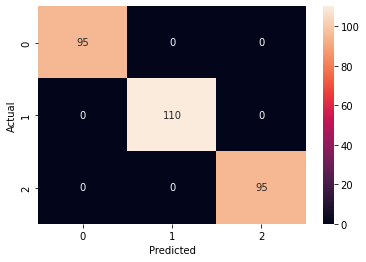

In [ ]:
sns.heatmap(confusion_matrix(Y_test, Y_pred),annot=True,fmt='g')
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [ ]:
print('Mean squared error for ',type(model).__name__,': ',getMSEForModel(type(model).__name__,Y_test, Y_pred))
Accuracy=getAccuracyForModel(model,Y_test,Y_pred)
print('Accuracy of ',type(model).__name__,' model: ',Accuracy)

Mean squared error for  SVR :  0.0

Accuracy of  SVR  model when K Fold=  10 : 
Min Accuracy 0.9876571941146587
Max Accuracy 0.9910158456963087
Mean Accuracy 0.9890937885012787

Accuracy of  SVR  model:  1.0


#### Stochastic Gradient Descent

- SGD stands for Stochastic Gradient Descent: the gradient of the loss is estimated each sample at a time and the model is updated along the way with a decreasing strength schedule (aka learning rate).

In [ ]:
from sklearn.linear_model import SGDRegressor

- The regularizer is a penalty added to the loss function that shrinks model parameters towards the zero vector using either the squared euclidean norm L2 or the absolute norm L1 or a combination of both (Elastic Net).
- n_iter_no_changeint, default=5
Number of iterations with no improvement to wait before stopping fitting.
- The ‘squared_error’ refers to the ordinary least squares fit.

In [ ]:
model = SGDRegressor(loss='squared_error', max_iter=10000, random_state=42)
model.fit(X_train,Y_train)

SGDRegressor(max_iter=10000, random_state=42)

In [ ]:
Y_pred = model.predict(X_test)
Y_pred

array([ 0.08988378,  1.29591088,  0.40685769,  1.81255102,  1.83399355,
        1.89251739,  1.03008872,  0.77855454,  0.91987363,  0.95234243,
        1.00428016,  0.00547725,  1.06156542,  0.13320124,  1.0838803 ,
        1.02453851,  1.83399355,  0.45561617,  0.97660386, -0.04786942,
        0.11377569,  0.92369319,  2.0519667 ,  0.93564295,  1.29591088,
        0.9540075 ,  0.93735687,  0.9540075 ,  1.06156542,  0.11858185,
        1.01205045, -0.13715047,  2.03078685,  1.77289789,  0.96954951,
       -0.1488927 ,  0.13320124,  0.1209944 ,  0.15597001,  1.29591088,
        1.76401756,  1.925892  ,  0.71893105,  0.71893105,  2.00792838,
        1.77289789,  1.07044575,  1.61338786,  0.94679223,  0.93902194,
        0.45561617,  1.76401756, -0.32115114,  2.11852351,  1.43831523,
        2.15867167,  0.15177131,  0.95234243,  0.15651989,  0.95234243,
        2.11852351,  0.45561617,  0.1209944 ,  1.84376888,  1.89951762,
        0.11858185,  0.7987223 ,  0.9540075 ,  0.93735687,  1.59

In [ ]:
Y_pred=np.abs(np.round(Y_pred))

In [ ]:
confusion_matrix(Y_test, Y_pred)

array([[ 82,  13,   0],
       [  0, 110,   0],
       [  0,   0,  95]])

In [ ]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       1.00      0.86      0.93        95
           1       0.89      1.00      0.94       110
           2       1.00      1.00      1.00        95

    accuracy                           0.96       300
   macro avg       0.96      0.95      0.96       300
weighted avg       0.96      0.96      0.96       300



Plotting a heatmap of the confusion matrix with flags annot=True which plots with numbers of strength and fmt='g' signifies the values to be displayed as integer.

Text(33.0, 0.5, 'Actual')

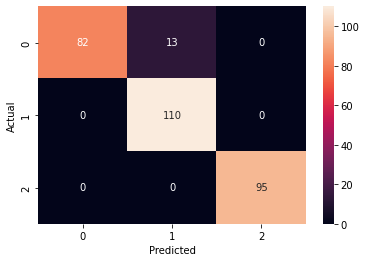

In [ ]:
sns.heatmap(confusion_matrix(Y_test, Y_pred),annot=True,fmt='g')
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [ ]:
print('Mean squared error for ',type(model).__name__,': ',getMSEForModel(type(model).__name__,Y_test, Y_pred))
Accuracy=getAccuracyForModel(model,Y_test,Y_pred)
print('Accuracy of ',type(model).__name__,' model: ',Accuracy)

Mean squared error for  SGDRegressor :  0.043333333333333335

Accuracy of  SGDRegressor  model when K Fold=  10 : 
Min Accuracy 0.8679346670449447
Max Accuracy 0.9367918066392555
Mean Accuracy 0.9194975013048818

Accuracy of  SGDRegressor  model:  0.9566666666666667


#### Ridge

- Linear least squares with l2 regularization.

In [ ]:
from sklearn.linear_model import Ridge

Minimizes the objective function:



```
||y - Xw||^2_2 + alpha * ||w||^2_2
```



In [ ]:
model = Ridge(alpha=0.5, solver='sag', random_state=42)
model.fit(X_train,Y_train)

Ridge(alpha=0.5, random_state=42, solver='sag')

This model solves a regression model where the loss function is the linear least squares function and regularization is given by the l2-norm.

In [ ]:
Y_pred = model.predict(X_test)
Y_pred

array([-0.00581864,  1.35873741,  0.33065218,  1.8314894 ,  1.85715113,
        1.91379917,  1.03032221,  1.00455229,  0.9509293 ,  0.95241128,
        1.04203674, -0.09692608,  0.99480379,  0.01797802,  1.11387621,
        1.01932511,  1.85715113,  0.42667349,  0.90259664, -0.09941055,
        0.12781682,  0.94319452,  2.02093484,  0.92142847,  1.35873741,
        0.9557104 ,  0.92271913,  0.9557104 ,  0.99480379,  0.32525941,
        1.05743267, -0.09432221,  2.00453046,  1.81223148,  0.91072046,
       -0.07882425,  0.01797802,  0.11451344,  0.26272794,  1.35873741,
        1.79463613,  1.83026847,  0.77537912,  0.77537912,  1.96309766,
        1.81223148,  1.01239914,  1.50790125,  0.94141418,  0.92601825,
        0.42667349,  1.79463613, -0.41852904,  2.10223615,  1.32419529,
        2.23271847,  0.10887146,  0.95241128,  0.14860465,  0.95241128,
        2.10223615,  0.42667349,  0.11451344,  1.89381487,  1.94496436,
        0.32525941,  0.64188121,  0.9557104 ,  0.92271913,  1.47

In [ ]:
Y_pred=np.abs(np.round(Y_pred))

Computes confusion matrix to evaluate the accuracy of a classification.

In [ ]:
confusion_matrix(Y_test, Y_pred)

array([[ 82,  13,   0],
       [  0, 110,   0],
       [  0,   3,  92]])

In [ ]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       1.00      0.86      0.93        95
           1       0.87      1.00      0.93       110
           2       1.00      0.97      0.98        95

    accuracy                           0.95       300
   macro avg       0.96      0.94      0.95       300
weighted avg       0.95      0.95      0.95       300



Plotting a heatmap of the confusion matrix with flags annot=True which plots with numbers of strength and fmt='g' signifies the values to be displayed as integer.

Text(33.0, 0.5, 'Actual')

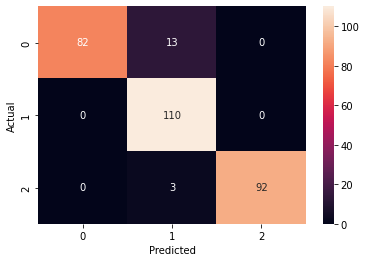

In [ ]:
sns.heatmap(confusion_matrix(Y_test, Y_pred),annot=True,fmt='g')
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [ ]:
print('Mean squared error for ',type(model).__name__,': ',getMSEForModel(type(model).__name__,Y_test, Y_pred))
Accuracy=getAccuracyForModel(model,Y_test,Y_pred)
print('Accuracy of ',type(model).__name__,' model: ',Accuracy)

Mean squared error for  Ridge :  0.05333333333333334

Accuracy of  Ridge  model when K Fold=  10 : 
Min Accuracy 0.8815834856707034
Max Accuracy 0.9484677209661919
Mean Accuracy 0.9283184444840555

Accuracy of  Ridge  model:  0.9466666666666667


#### DEEP LEARNING

Building Neural Network Model

In [ ]:
X=df.drop('Level',axis=1)
Y=pd.get_dummies(df['Level'])

Importing libs for deep learning model

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

In [ ]:
# sequential model to initialise our ann and dense module to build the layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from sklearn.metrics import classification_report

Splitting dataset in to train and test

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,stratify=Y,random_state=12)

In [ ]:
X_train.shape,Y_train.shape

((700, 23), (700, 3))

In [ ]:
X_train.shape[1]

23

In [ ]:
dlModel = Sequential()
# Adding the input layer and the first hidden layer
dlModel.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim = X.shape[1]))

# Adding the second hidden layer
dlModel.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
dlModel.add(Dense(units = 8, activation = "relu"))

# Adding the output layer
dlModel.add(Dense(units = 3, kernel_initializer = 'uniform', activation = 'softmax'))

# Compiling the ANN | means applying SGD on the whole ANN
dlModel.compile(optimizer = 'adam', loss = 'categorical_crossentropy', 
                   metrics = ['accuracy'])


In [ ]:
history = dlModel.fit(X_train, Y_train, epochs = 50, validation_split = 0.3)

Epoch 1/50
16/16 [==============================] - 1s 41ms/step - loss: 1.0973 - accuracy: 0.3640 - val_loss: 1.0956 - val_accuracy: 0.3697
Epoch 2/50
16/16 [==============================] - 0s 5ms/step - loss: 1.0929 - accuracy: 0.3640 - val_loss: 1.0891 - val_accuracy: 0.3697
Epoch 3/50
16/16 [==============================] - 0s 5ms/step - loss: 1.0816 - accuracy: 0.3640 - val_loss: 1.0736 - val_accuracy: 0.3697
Epoch 4/50
16/16 [==============================] - 0s 5ms/step - loss: 1.0593 - accuracy: 0.3640 - val_loss: 1.0443 - val_accuracy: 0.3697
Epoch 5/50
16/16 [==============================] - 0s 4ms/step - loss: 1.0195 - accuracy: 0.3640 - val_loss: 0.9990 - val_accuracy: 0.3744
Epoch 6/50
16/16 [==============================] - 0s 5ms/step - loss: 0.9584 - accuracy: 0.4274 - val_loss: 0.9220 - val_accuracy: 0.5450
Epoch 7/50
16/16 [==============================] - 0s 6ms/step - loss: 0.8759 - accuracy: 0.5746 - val_loss: 0.8403 - val_accuracy: 0.5782
Epoch 8/50
16/16 [=

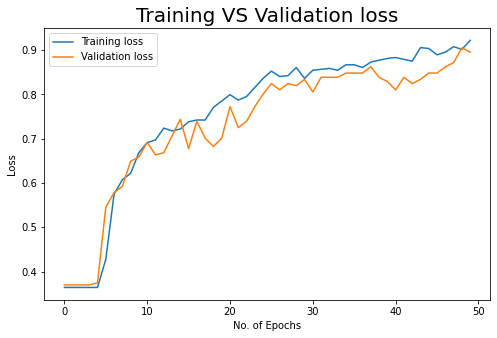

In [ ]:
plt.figure(figsize = (8,5))
plt.plot(history.history["accuracy"], label= "Training loss")
plt.plot(history.history["val_accuracy"], label= "Validation loss")
plt.title("Training VS Validation loss", fontsize = 20)
plt.xlabel("No. of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

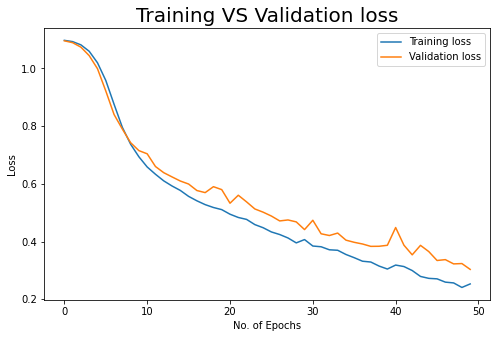

In [ ]:
plt.figure(figsize = (8,5))
plt.plot(history.history["loss"], label= "Training loss")
plt.plot(history.history["val_loss"], label= "Validation loss")
plt.title("Training VS Validation loss", fontsize = 20)
plt.xlabel("No. of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
score, acc = dlModel.evaluate(X_train, Y_train,batch_size=10)
print('Train score:', score)
print('Train accuracy:', acc)

70/70 [==============================] - 0s 2ms/step - loss: 0.2560 - accuracy: 0.9200
Train score: 0.25604990124702454
Train accuracy: 0.9200000166893005


In [ ]:
# Predicting the Test set results
y_pred = dlModel.predict(X_test)

10/10 [==============================] - 0s 2ms/step


In [ ]:
score, acc = dlModel.evaluate(X_test, Y_test,batch_size=10)

print('Test score:', score)
print('Test accuracy:', acc)

30/30 [==============================] - 0s 1ms/step - loss: 0.2394 - accuracy: 0.9200
Test score: 0.2394431084394455
Test accuracy: 0.9200000166893005


In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test.values.argmax(axis=1), y_pred.argmax(axis=1))
print(cm)

[[ 87   4   0]
 [ 16  81   3]
 [  0   1 108]]


Text(0.5, 15.0, 'Predicted label')

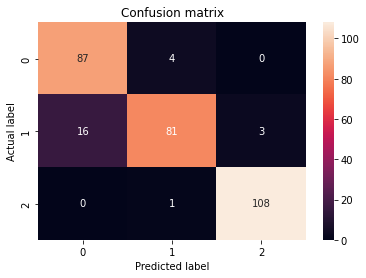

In [ ]:
p = sns.heatmap(pd.DataFrame(cm), annot=True ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test.values.argmax(axis=1), y_pred.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90        91
           1       0.94      0.81      0.87       100
           2       0.97      0.99      0.98       109

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



#### Analysis

In [ ]:
print('Accuray of every model on this dataset')
accuracyTracker

Accuray of every model on this dataset


{'LogisticRegression': 0.98,
 'LinearRegression': 0.9466666666666667,
 'GaussianNB': 0.8733333333333333,
 'BernoulliNB': 0.88,
 'RandomForestRegressor': 1.0,
 'SVR': 1.0,
 'SGDRegressor': 0.9566666666666667,
 'Ridge': 0.9466666666666667}

In [ ]:
print('MSE of every model on this dataset')
mseTracker

MSE of every model on this dataset


{'LogisticRegression': 0.02,
 'LinearRegression': 0.05333333333333334,
 'GaussianNB': 0.17666666666666667,
 'BernoulliNB': 0.17,
 'RandomForestRegressor': 0.0,
 'SVR': 0.0,
 'SGDRegressor': 0.043333333333333335,
 'Ridge': 0.05333333333333334}

In [ ]:
print('Min, Max and Mean accuraies of all models obtained by K Fold =10')
KFoldAccuries

Min, Max and Mean accuraies of all models obtained by K Fold =10


,Model,Min Accuracy,Mean Accuracy,Max Accuracy
0,LogisticRegression,0.942857,0.977143,1.000000
1,LinearRegression,0.881773,0.928326,0.948382
2,GaussianNB,0.857143,0.900000,0.971429
3,BernoulliNB,0.828571,0.894286,0.942857
4,RandomForestRegressor,0.999926,0.999984,1.000000
5,SVR,0.987657,0.989094,0.991016
6,SGDRegressor,0.867935,0.919498,0.936792
7,Ridge,0.881583,0.928318,0.948468


In [ ]:
RESULT=KFoldAccuries.copy()
B=pd.DataFrame(mseTracker.items(), columns=['Model', 'MSE'])
B['Accuracy'] = B['Model'].map(accuracyTracker)
B=pd.merge(B,scoreTracker,on='Model')
RESULT=pd.merge(RESULT,B,on='Model')

Consolidated results of all metrics amoung different models

In [ ]:
RESULT

,Model,Min Accuracy,Mean Accuracy,Max Accuracy,MSE,Accuracy,Precision,Recall,F1-score
0,LogisticRegression,0.942857,0.977143,1.000000,0.020000,0.980000,0.980020,0.981340,0.980431
1,LinearRegression,0.881773,0.928326,0.948382,0.053333,0.946667,0.957672,0.943860,0.947571
2,GaussianNB,0.857143,0.900000,0.971429,0.176667,0.873333,0.887858,0.877671,0.876326
3,BernoulliNB,0.828571,0.894286,0.942857,0.170000,0.880000,0.894029,0.886124,0.881581
4,RandomForestRegressor,0.999926,0.999984,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
5,SVR,0.987657,0.989094,0.991016,0.000000,1.000000,1.000000,1.000000,1.000000
6,SGDRegressor,0.867935,0.919498,0.936792,0.043333,0.956667,0.964770,0.954386,0.956920
7,Ridge,0.881583,0.928318,0.948468,0.053333,0.946667,0.957672,0.943860,0.947571


Result: 
- Random Forest Regressor is giving the best result. The deep learning model is an optimum model as the train and test accuraies are good.
- We have used Models like Logistic Regression, SVM, Naïve Bayes, Random Forest. By evaluating the model, we found that the best models are Random Forest and SVM for this dataset.
- As a future work we would like to collect more data from many real-world sources, labs and hospitals across the globe and develop the machine learning model to achieve highest accuracy and prevent overfitting of data.